In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
%matplotlib inline

In [78]:
equipos = pd.read_csv('Datos/equipo.csv', header = None, names = ['Nombre_del_equipo', 'Imagen', 'Pais', 'id_equipo'])
partidos = pd.read_csv('Datos/partidos.csv', header = None, names = ['fecha y hora', 'id_equipo_local', 'id_equipo_visitante', 'Victoria_local', 'Empate', 'Derrota'])

In [79]:
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre_del_equipo  32 non-null     object
 1   Imagen             32 non-null     object
 2   Pais               32 non-null     object
 3   id_equipo          32 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [80]:
equipos.describe()

,id_equipo
count,32.000000
mean,16.031250
std,8.110067
min,1.000000
25%,10.750000
50%,14.500000
75%,22.250000
max,30.000000


In [81]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha y hora         96 non-null     object
 1   id_equipo_local      96 non-null     int64 
 2   id_equipo_visitante  96 non-null     int64 
 3   Victoria_local       96 non-null     int64 
 4   Empate               96 non-null     int64 
 5   Derrota              96 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.6+ KB


In [82]:
partidos.describe()

,id_equipo_local,id_equipo_visitante,Victoria_local,Empate,Derrota
count,96.000000,96.000000,96.0,96.0,96.0
mean,16.500000,16.500000,33.0,34.0,33.0
std,9.281561,9.281561,0.0,0.0,0.0
min,1.000000,1.000000,33.0,34.0,33.0
25%,8.750000,8.750000,33.0,34.0,33.0
50%,16.500000,16.500000,33.0,34.0,33.0
75%,24.250000,24.250000,33.0,34.0,33.0
max,32.000000,32.000000,33.0,34.0,33.0


<AxesSubplot: >

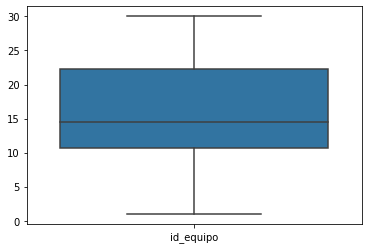

In [83]:
sns.boxplot(data=equipos)

<AxesSubplot: >

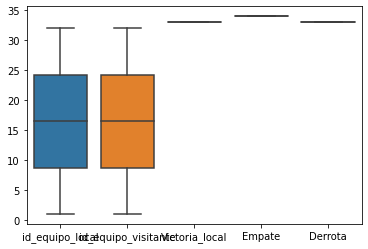

In [84]:
sns.boxplot(data=partidos)

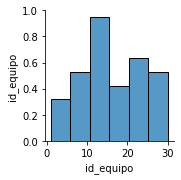

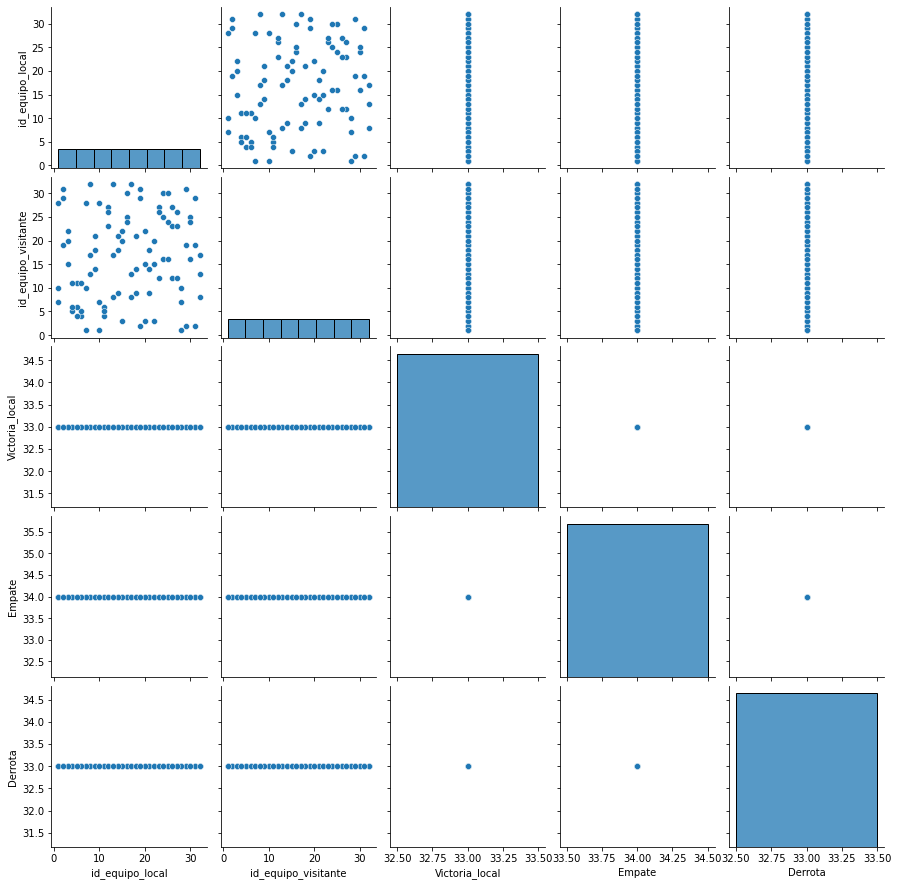

In [85]:
sns.pairplot(data=equipos)
sns.pairplot(data=partidos)

In [86]:
corr_equipos = equipos.corr()
corr_partidos = partidos.corr()

<AxesSubplot: >

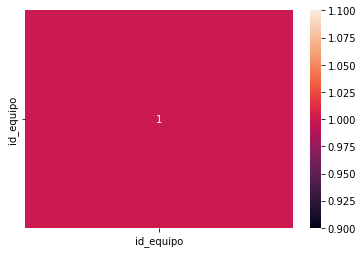

In [87]:
sns.heatmap(corr_equipos, annot=True)


<AxesSubplot: >

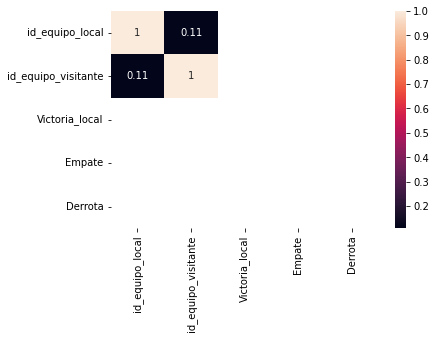

In [88]:
sns.heatmap(corr_partidos, annot=True)

## Creación del modelo

In [89]:
X = partidos['id_equipo_local']
X = X.values.reshape(-1, 1)
y = partidos['id_equipo_visitante']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [90]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo_predictions = modelo.predict(X_test)

In [91]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(modelo.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(modelo.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[0.11572389]

 Valor de la intersección o coeficiente "b":
15.330873423444428


In [92]:
# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test,modelo_predictions))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, modelo_predictions)*100)
print('Mean Squared Error:', mean_squared_error(y_test, modelo_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, modelo_predictions)))
print('R^2 coefficient of determination:', r2_score(y_test, modelo_predictions))


Mean Absolute Error: 7.325805738753516
Mean Absolute Percentage Error: 206.82205453842192
Mean Squared Error: 80.62021955540331
Root Mean Squared Error: 8.97887629692064
R^2 coefficient of determination: -0.1883876703331855


In [93]:
mod_L2_reg = Ridge(alpha = 1, random_state=100)
mod_L2_reg.fit(X_train, y_train)
y_pred_l2_mod = mod_L2_reg.predict(X_test)

In [94]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE l2')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_L2_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_L2_reg.intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE l2

 Valor de las pendientes o coeficientes "a":
[0.11570606]

 Valor de la intersección o coeficiente "b":
15.33117110834977


In [95]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l2_mod))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_l2_mod)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l2_mod))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l2_mod)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_l2_mod))

Mean Absolute Error: 7.3258139256748676
Mean Absolute Percentage Error: 206.82098896920516
Mean Squared Error: 80.62014281880064
Root Mean Squared Error: 8.978872023745557
R^2 coefficient of determination: -0.18838653919222637


In [96]:
mod_L1_reg = Lasso(alpha = 1)
mod_L1_reg.fit(X_train, y_train)
y_pred_l1_mod = mod_L1_reg.predict(X_test)

In [100]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE L1')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_L1_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_L1_reg.intercept_)


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE L1

 Valor de las pendientes o coeficientes "a":
[0.10401364]

 Valor de la intersección o coeficiente "b":
15.526403821240242


In [102]:
mod_elastic_reg = ElasticNet(alpha=1, l1_ratio=0.2, random_state=100)
mod_elastic_reg.fit(X_train, y_train)
y_pred_elastic_mod = mod_elastic_reg.predict(X_test)

In [103]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net ')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(mod_elastic_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(mod_elastic_reg.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE Elastic Net 

 Valor de las pendientes o coeficientes "a":
[0.11232952]

 Valor de la intersección o coeficiente "b":
15.387550571059798


In [104]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_mod))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic_mod)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_mod))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_mod)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic_mod))

Mean Absolute Error: 7.327364471970045
Mean Absolute Percentage Error: 206.6191775274942
Mean Squared Error: 80.6065823270964
Root Mean Squared Error: 8.978116858623327
R^2 coefficient of determination: -0.18818664986875588
